# Повышение эффективности работы городской клиники за счет снижения доли no-show (неявок пациентов на прием)


### Описание задания
Городская клиника экспериментально внедрила SMS‑напоминания пациентам о записи на прием. Через 6 месяцев у администрации накопились данные о 110 тыс. записей: для каждой указано, пришел ли пациент и отправлялось ли SMS.

Руководство хочет понять:

- Снижает ли SMS долю no‑show (процент или часть всех запланированных приемов, на которые пациент в итоге не пришел)?

- Какие факторы (возраст, хронические заболевания) сильнее всего связаны с явкой?

- Какие практические меры помогут повысить посещаемость?

###Описание данных

Нам предоставлен набор данных, который содержит информацию о медицинских назначениях, набор содержит 14 признаков.

Основные признаки:

- PatientId - уникальный идентификатор пациента
- AppointmentID - идентификатор записи
- Gender -пол
- ScheduledDay -дата создания записи
- AppointmentDay -дата приема
- Age  -возраст
- Neighbourhood -район клиники
- Scholarship - участвовал ли пациент в благотворительной программе
- Hipertension, Diabetes, Alcoholism,Handcap-хронические состояния (0/1)
- SMS_received - было ли SMS‑напоминание (0/1)
- No-show -факт отсутствия на приеме (Yes/No)



Алгоритм выполнения задания
Этап 0. Постановка задачи
Сформулируйте бизнес‑цель исследования и KPIs по SMART.

Сделайте декомпозицию: разбейте задачу на подзадачи.

Этап 1. Подготовка данных
Импортируйте файл в pandas, выведите head() и основные типы столбцов.

Проверьте наличие пропусков, дубликатов, некорректных значений (например, отрицательный Age).

Приведите признаки к корректным типам (даты → datetime, категориальные → category).

Этап 2. Разведочный анализ
Посчитайте описательные статистики (mean, median, std, квартили) для числовых признаков отдельно для групп Show и No-show.

Постройте минимум три информативных визуализации (boxplot/violin, barplot доли no-show по возрастным группам, heatmap корреляций и т. д.).

Сделайте предварительные наблюдения: какие факторы визуально связаны с явкой?

Этап 3. Статистические гипотезы
Заполните таблицу. При необходимости добавьте строки.


Гипотеза H₀ и H₁

| Тест | P‑value |
|--|--|
|1|SMS‑напоминание не влияет на долю no‑show VS уменьшает ее|
|2|Средний интервал days_between (ScheduledDay, AppointmentDay) одинаков у Show и No‑show|
|3|Распределение возраста одинаково в группах|





Используйте α = 0,05.

Для каждого теста:

Опишите допущения и проверьте их.

Интерпретируйте результат с позиций бизнеса.

Этап 4. Выводы и рекомендации
Сформулируйте не менее трех практических рекомендаций для клиники, например, изменение SMS‑кампании или планирование слотов.

Обсудите ограничения исследования (качество данных, внешние факторы, необходимость эксперимента).



In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## Предварительный анализ данных

Приступаем к загрузке данных


In [158]:
df=pd.read_csv('/content/KaggleV2-May-2016.csv')

In [159]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [160]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [161]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [162]:
df.duplicated().sum()

np.int64(0)

In [163]:
df.shape

(110527, 14)

In [164]:
(df.isnull().sum()/df.shape[0])*100

,0
PatientId,0.0
AppointmentID,0.0
Gender,0.0
ScheduledDay,0.0
AppointmentDay,0.0
Age,0.0
Neighbourhood,0.0
Scholarship,0.0
Hipertension,0.0
Diabetes,0.0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


В наборе содержится 110527 строк и 14 признаков, в нем нет дубликатов и пропущенных значений. Необходимо переименовать названия колонок в соответствии с PEP8. Кроме того, у колонок ScheduledDay и AppointmentDay необходимо заменить тип  данных    с      object на datetime. Колонки PatientId и AppointmentID должны быть удалены в связи с неинформативностью.



## EDA

удаляем колонки PatientId'и 'AppointmentID'

In [166]:
df.drop(['PatientId','AppointmentID'],inplace=True,axis=1)

переименовываем колонки

In [167]:
df=df.rename(columns={'No-show':'no_show','Gender':'gender','ScheduledDay':'scheduled_day',
                   'AppointmentDay':'appointment_day','Age':'age','Neighbourhood':'neighbourhood',
                   'Scholarship':'scholarship','Hipertension':'hipertension','Diabetes':'diabetes',
                   'Alcoholism':'alcoholism','Handcap':'handcap','SMS_received':'sms_received'})
df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

преобразовываем колонки scheduled_day и appointment_day в тип datetime, до преобразования данные содержат символ Z в конце строки. Поэтому сначала удаляем указанный символ, затем приводим к корректному типу данных


In [168]:
df['scheduled_day']=pd.to_datetime(df['scheduled_day'].str.replace('Z',''))
df['scheduled_day']=df['scheduled_day'].dt.tz_localize(None)

Убираем из наблюдений по датам назначенного приема и дате фактического приема часы посещения в связи с неинформативностью


In [169]:
df['scheduled_day'] = df['scheduled_day'].dt.date
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

In [170]:
df['appointment_day']=pd.to_datetime(df['appointment_day'].str.replace('Z',''))

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gender           110527 non-null  object        
 1   scheduled_day    110527 non-null  datetime64[ns]
 2   appointment_day  110527 non-null  datetime64[ns]
 3   age              110527 non-null  int64         
 4   neighbourhood    110527 non-null  object        
 5   scholarship      110527 non-null  int64         
 6   hipertension     110527 non-null  int64         
 7   diabetes         110527 non-null  int64         
 8   alcoholism       110527 non-null  int64         
 9   handcap          110527 non-null  int64         
 10  sms_received     110527 non-null  int64         
 11  no_show          110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [172]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


преобразования прошли успешно, колонки с типом данных object преобразовываем в category

In [173]:
object_columns=df.select_dtypes(include=['object']).columns

In [174]:
df[object_columns]=df[object_columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gender           110527 non-null  category      
 1   scheduled_day    110527 non-null  datetime64[ns]
 2   appointment_day  110527 non-null  datetime64[ns]
 3   age              110527 non-null  int64         
 4   neighbourhood    110527 non-null  category      
 5   scholarship      110527 non-null  int64         
 6   hipertension     110527 non-null  int64         
 7   diabetes         110527 non-null  int64         
 8   alcoholism       110527 non-null  int64         
 9   handcap          110527 non-null  int64         
 10  sms_received     110527 non-null  int64         
 11  no_show          110527 non-null  category      
dtypes: category(3), datetime64[ns](2), int64(7)
memory usage: 7.9 MB


преобразования прошли успешно

## Описательная статистика

In [175]:
df.select_dtypes(include=['int','float']).describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


После анализа цифровых значений, выявили отрицательные значения в колонке Age, следовательно необходимо избавиться от них. Колонки diabetes, alcoholism, handcap, sms_received должны иметь только два значения (True/False), однако в колоке handcap видим максимальное значение 4

In [176]:
df.select_dtypes(include=['category']).describe()

,gender,neighbourhood,no_show
count,110527,110527,110527
unique,2,81,2
top,F,JARDIM CAMBURI,No
freq,71840,7717,88208


В признаках преобладают женщины, самый попуярный район- это JARDIM CAMBURI, в части посещения - больше явок, чем неявок

## Очистка данных

Удаляем строку в колонке Age с отрицательным значением, удаление проводится вручную, поскольку только одна запись, не оказывающая существенное влияние на колонку Age, также удаляем нулевые значения


In [177]:
df[df.age==-1]

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [178]:
df=df[df.age>0].reset_index(drop=True)

In [179]:
df[df.handcap>1]['handcap'].value_counts()

,count
handcap,
2,183
3,13
4,3


При более детальном изучении колонки handcap, выявили 200 наблюдений со значением больше 1, поскольку данная колонка подразумевается для бинарных данных (True/False), то значениям выше единицы присваем значение 1

In [180]:
df.loc[df['handcap']>1,'handcap']=1

In [181]:
df['handcap'].value_counts()

,count
handcap,
0,104747
1,2240


In [182]:
category_columns=df.select_dtypes(include='category').columns.tolist()
numeric_columns=df.select_dtypes(include=['int','float']).columns.tolist()
print(category_columns,numeric_columns)

['gender', 'neighbourhood', 'no_show'] ['age', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']


In [183]:
df['binary_gender']=df['gender'].map({'M':1,'F':0})
df['binary_gender']=df['binary_gender'].astype('int')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gender           106987 non-null  category      
 1   scheduled_day    106987 non-null  datetime64[ns]
 2   appointment_day  106987 non-null  datetime64[ns]
 3   age              106987 non-null  int64         
 4   neighbourhood    106987 non-null  category      
 5   scholarship      106987 non-null  int64         
 6   hipertension     106987 non-null  int64         
 7   diabetes         106987 non-null  int64         
 8   alcoholism       106987 non-null  int64         
 9   handcap          106987 non-null  int64         
 10  sms_received     106987 non-null  int64         
 11  no_show          106987 non-null  category      
 12  binary_gender    106987 non-null  int64         
dtypes: category(3), datetime64[ns](2), int64(8)
memory usage: 8.5 MB


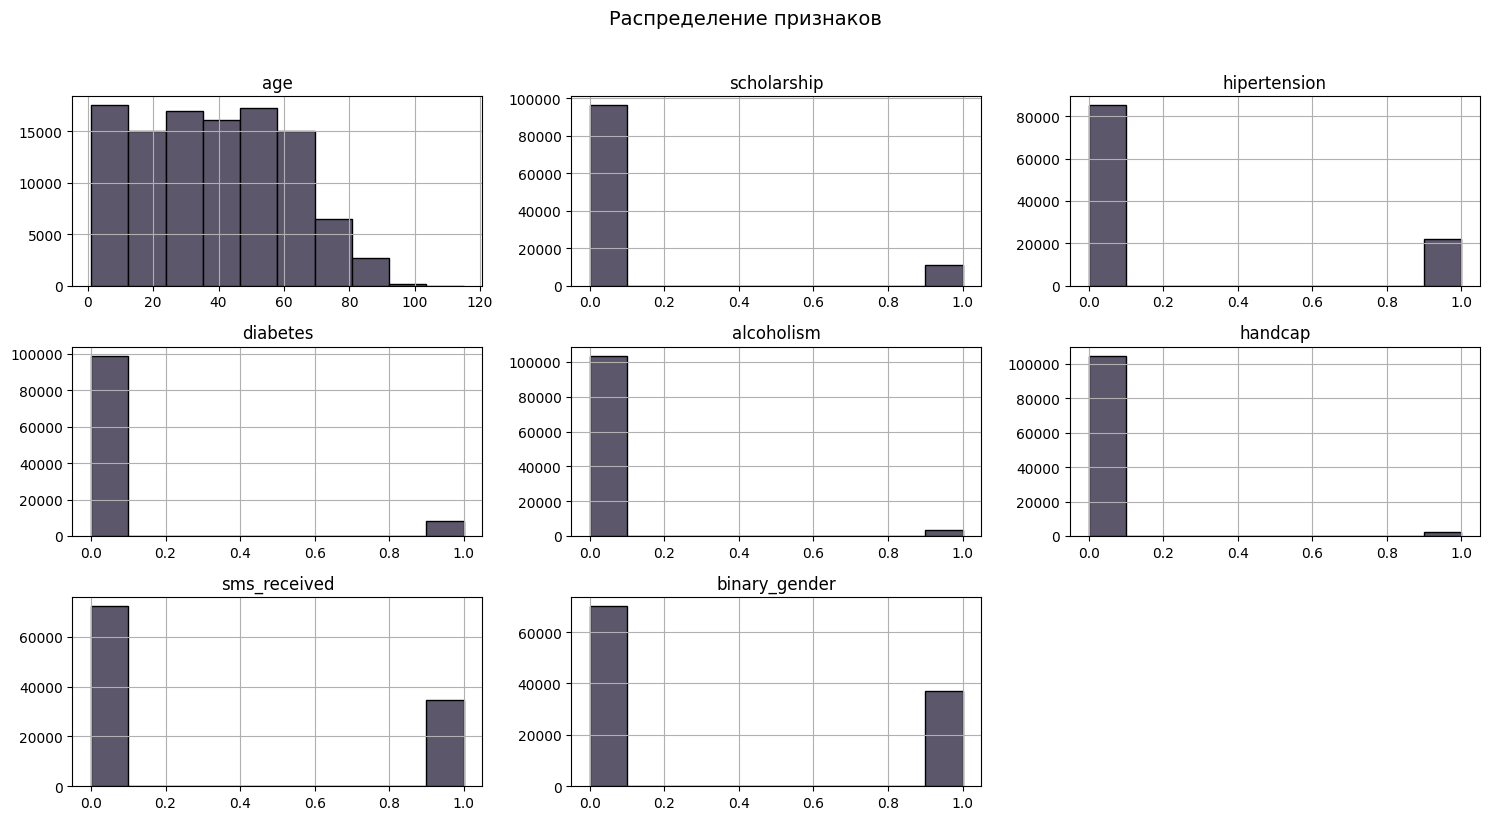

In [185]:
df[df.columns.drop(['scheduled_day','appointment_day'])].hist(figsize=(15,8),
        color='#5d576b',
        edgecolor='black',
        xlabelsize=10,
        ylabelsize=10)
plt.suptitle('Распределение признаков', y=1.02,fontsize=14)
plt.tight_layout()
plt.show()

Полученная визуалиция помогает сделать выводы о том, в данных мало пацентов, страдающих гипертонией, диабетом, алкоголизмом, а также мало инвалидов

Осуществляем деление групп на Show и No Show


In [186]:
show = (df['no_show'] == 'No')
no_show = (df['no_show'] == 'Yes')

In [187]:
df[show].describe().T

,count,mean,min,25%,50%,75%,max,std
scheduled_day,85307,2016-05-10 10:46:09.451510528,2015-11-10 00:00:00,2016-05-02 00:00:00,2016-05-11 00:00:00,2016-05-24 00:00:00,2016-06-08 00:00:00,NaN
appointment_day,85307,2016-05-19 04:28:34.860445184,2016-04-29 00:00:00,2016-05-09 00:00:00,2016-05-18 00:00:00,2016-05-31 00:00:00,2016-06-08 00:00:00,NaN
age,85307.0,39.075187,1.0,20.0,39.0,57.0,115.0,22.649713
scholarship,85307.0,0.096569,0.0,0.0,0.0,0.0,1.0,0.295372
hipertension,85307.0,0.211343,0.0,0.0,0.0,0.0,1.0,0.408263
diabetes,85307.0,0.076348,0.0,0.0,0.0,0.0,1.0,0.265555
alcoholism,85307.0,0.031451,0.0,0.0,0.0,0.0,1.0,0.174535
handcap,85307.0,0.021487,0.0,0.0,0.0,0.0,1.0,0.145002
sms_received,85307.0,0.293258,0.0,0.0,0.0,1.0,1.0,0.455259
binary_gender,85307.0,0.345388,0.0,0.0,0.0,1.0,1.0,0.475497


In [188]:
df[no_show].describe().T

,count,mean,min,25%,50%,75%,max,std
scheduled_day,21680,2016-05-02 17:56:16.826568192,2015-12-03 00:00:00,2016-04-25 00:00:00,2016-05-04 00:00:00,2016-05-16 00:00:00,2016-06-08 00:00:00,NaN
appointment_day,21680,2016-05-18 12:52:52.250922752,2016-04-29 00:00:00,2016-05-09 00:00:00,2016-05-17 00:00:00,2016-05-31 00:00:00,2016-06-08 00:00:00,NaN
age,21680.0,35.329151,1.0,18.0,33.0,52.0,115.0,21.470631
scholarship,21680.0,0.118589,0.0,0.0,0.0,0.0,1.0,0.323311
hipertension,21680.0,0.173985,0.0,0.0,0.0,0.0,1.0,0.379106
diabetes,21680.0,0.065959,0.0,0.0,0.0,0.0,1.0,0.248217
alcoholism,21680.0,0.031227,0.0,0.0,0.0,0.0,1.0,0.173935
handcap,21680.0,0.018773,0.0,0.0,0.0,0.0,1.0,0.135726
sms_received,21680.0,0.441328,0.0,0.0,0.0,1.0,1.0,0.496557
binary_gender,21680.0,0.341559,0.0,0.0,0.0,1.0,1.0,0.474243


In [189]:
age_bins=[0,20,40,60,80,100]
age_labels=['0-19','20-39','40-59','60-79','80+']
age_df_show = pd.cut(df[show]['age'], bins=age_bins,labels=age_labels, right=False)
age_df_no_show = pd.cut(df[no_show]['age'], bins=age_bins,labels=age_labels, right=False)

age_df_show


,age
0,60-79
1,40-59
2,60-79
3,0-19
4,40-59
...,...
106982,40-59
106983,40-59
106984,20-39
106985,20-39


In [190]:
age_group_counts_show=age_df_show.value_counts().sort_index()
age_group_counts_no_show=age_df_no_show.value_counts().sort_index()

age_group_percent_show=(age_group_counts_show/age_group_counts_show.sum())*100
age_group_percent_no_show=(age_group_counts_no_show/age_group_counts_no_show.sum())*100


In [191]:
data_show=pd.DataFrame({'age_group':age_group_counts_show.index,'count':age_group_counts_show.values,'age_group_percent':age_group_percent_show.values})
data_no_show=pd.DataFrame({'age_group':age_group_counts_no_show.index,'count':age_group_counts_no_show.values,'age_group_percent':age_group_percent_no_show.values})


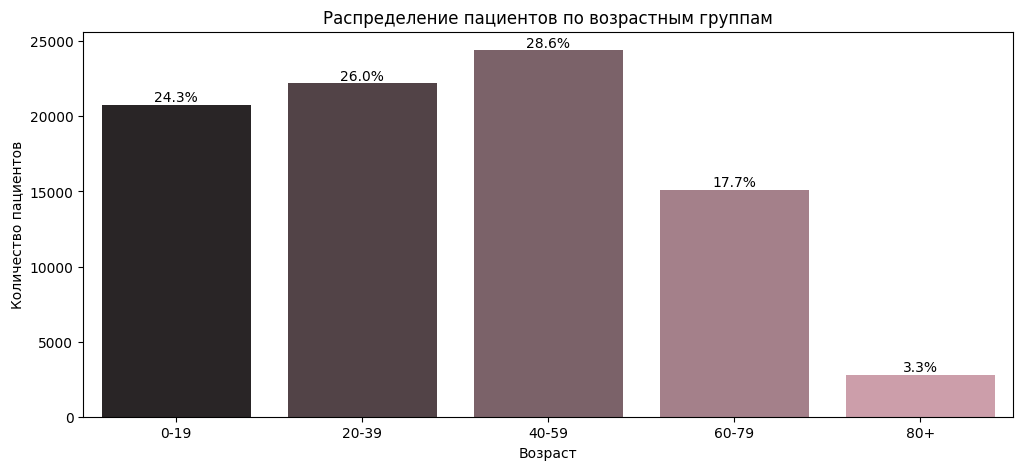

In [192]:
plt.figure(figsize=(12, 5))
sns.barplot(data=data_show, x='age_group',y='count',hue='age_group', color='#d496a7')
for i, (count, perc) in enumerate(zip(data_show['count'],data_show['age_group_percent'])):
    plt.text(i, count, f'{perc:.1f}%', ha='center', va='bottom')
plt.title('Распределение пациентов по возрастным группам')
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')
plt.show()

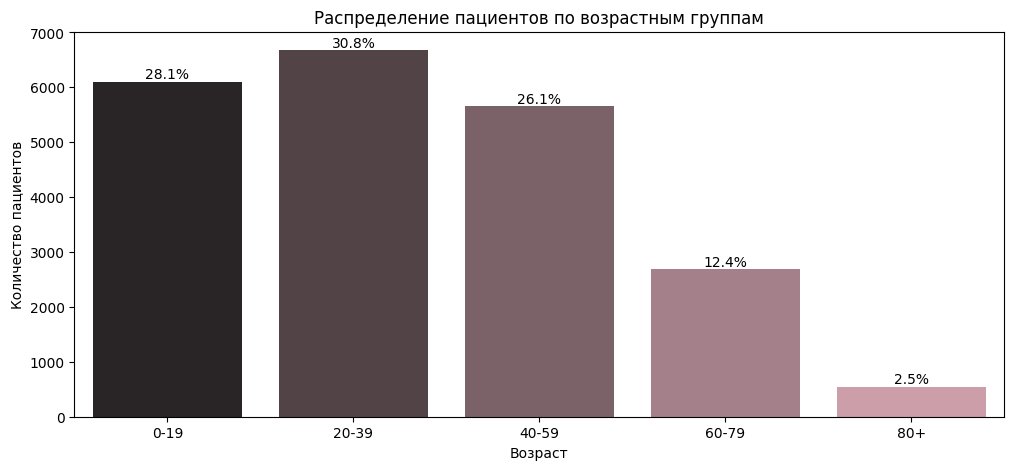

In [193]:
plt.figure(figsize=(12, 5))
sns.barplot(data=data_no_show,x='age_group',y='count',hue='age_group', color='#d496a7')
for i, (count, perc) in enumerate(zip(data_no_show['count'],data_no_show['age_group_percent'])):
    plt.text(i, count, f'{perc:.1f}%', ha='center', va='bottom')
plt.title('Распределение пациентов по возрастным группам')
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')
plt.show()

Анализ распределения пациентов по возрастным группам позволяет сделать вывод о том, что самый большой сегмент пациентов это люди в возрасте 40-59 лет

Проанализируем в разрезе пациентов кто ходит и нет их возврастные группы

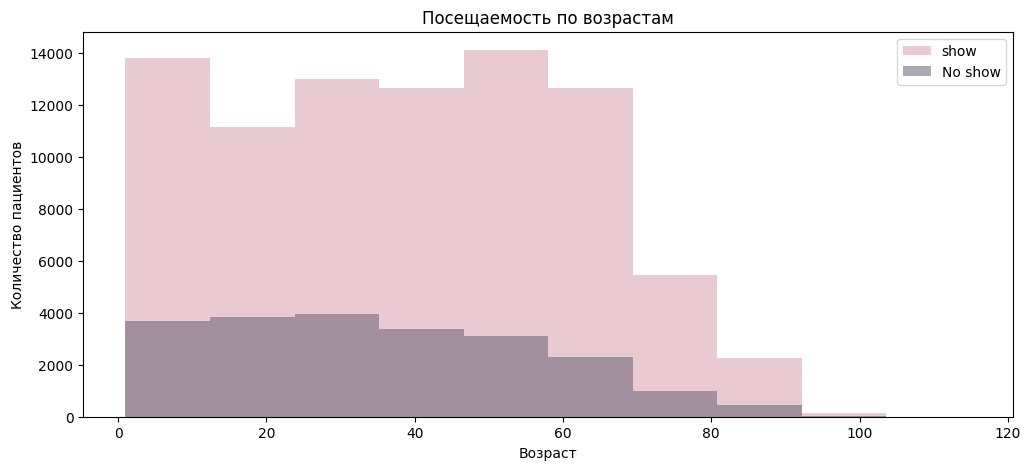

In [194]:
plt.figure(figsize=(12, 5))
plt.hist(df['age'][show], alpha=0.5,  label='show', color='#d496a7')
plt.hist(df['age'][no_show],  alpha=0.5, label='No show', color='#5d576b')
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')
plt.title('Посещаемость по возрастам')
plt.legend()

plt.show()

При изучении информации о явках и неявках, можно сделать вывод, что количество явившихся превалирует над теми, кто не явился (85 000 vs 21 000).Снижение явок наблюдается в возрасте около 15-25 лет и после 70

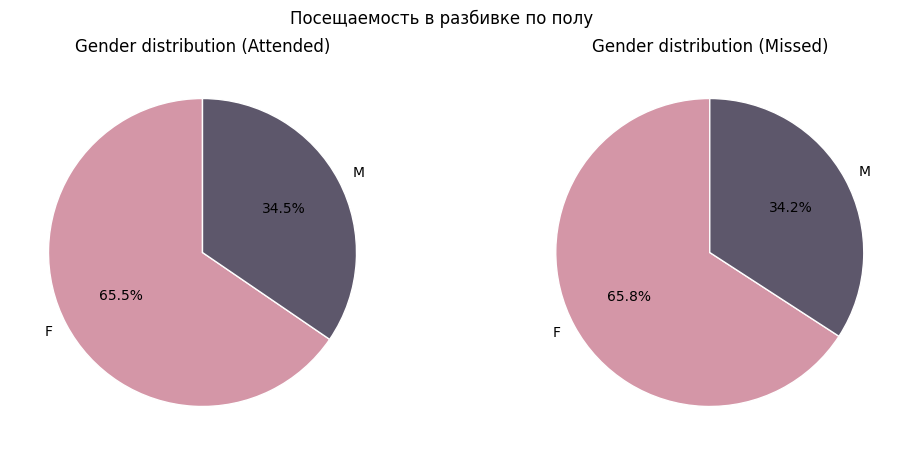

In [195]:
gender_data = {
    'Attended': df[show]['gender'].value_counts(normalize=True),
    'Missed': df[no_show]['gender'].value_counts(normalize=True)
}
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
colors = ['#d496a7', '#5d576b']
for ax, (title, data) in zip(axs, gender_data.items()):
    data.plot.pie(ax=ax, autopct='%1.1f%%', colors=colors,
                 startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
    ax.set_title(f'Gender distribution ({title})', fontsize=12)
    ax.set_ylabel('')
plt.suptitle('Посещаемость в разбивке по полу')
plt.show()

При сравнении посещаемости в зависимости от пола наблюдаем схожесть процентного распределения как по явкам, так и по неявкам

In [196]:
patient_data = df.copy(deep=True)
patient_data['chronic_condition'] = (patient_data['hipertension']
                                    | patient_data['diabetes']
                                    | patient_data['alcoholism'])

In [197]:
patient_data.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,binary_gender,chronic_condition
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1


<Figure size 1000x600 with 0 Axes>

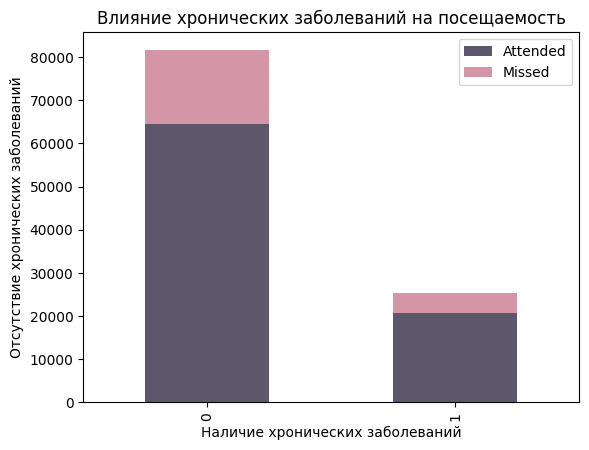

In [198]:
desease_stat=patient_data.groupby(['chronic_condition', 'no_show']).size().unstack().rename(columns={'No': 'Attended', 'Yes': 'Missed'})
plt.figure(figsize=(10, 6))
desease_stat.plot(kind='bar',stacked=True, color=['#5d576b','#d496a7'])
plt.xlabel('Наличие хронических заболеваний')
plt.ylabel('Отсутствие хронических заболеваний')
plt.title('Влияние хронических заболеваний на посещаемость')
plt.legend()

plt.show()

In [199]:
df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show', 'binary_gender'],
      dtype='object')

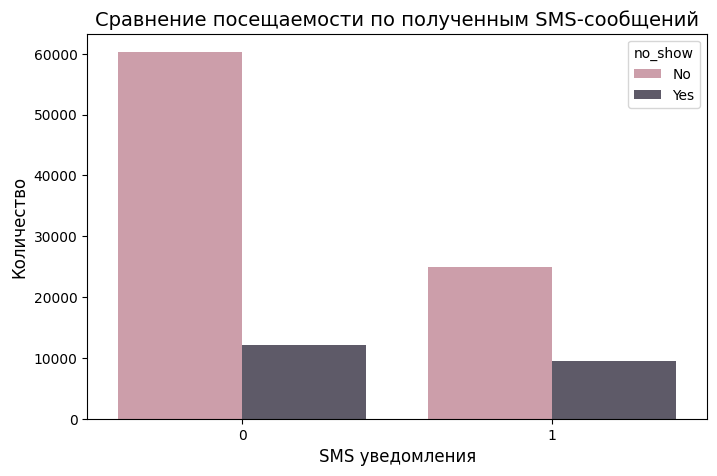

In [200]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sms_received', hue='no_show', data=df, palette=['#d496a7', '#5d576b'])
plt.xlabel('SMS уведомления', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Сравнение посещаемости по полученным SMS-сообщений', fontsize=14)

plt.show()

Анализ явок в разрезе направленных смс-сообщений позволяет сделать ориентировочный вывод о неэффективности рассылок

In [201]:
sms_stats = df.groupby(['sms_received', 'no_show']).size().unstack()
sms_percent = sms_stats.div(sms_stats.sum(axis=1), axis=0) * 100
print("Влияние SMS на посещаемость:")
print(sms_percent.round(2).to_string())

Влияние SMS на посещаемость:
no_show          No    Yes
sms_received              
0             83.27  16.73
1             72.33  27.67


Теперь проанализируем статистику по назначенным приемам и фактам посещения

In [202]:
same_day_mask = (df['scheduled_day'].dt.date == df['appointment_day'].dt.date)
same_day_count=len(same_day_mask)
print(same_day_count)

106987


In [203]:
same_day_count = same_day_mask.sum()
other_day_count = len(df) - same_day_count

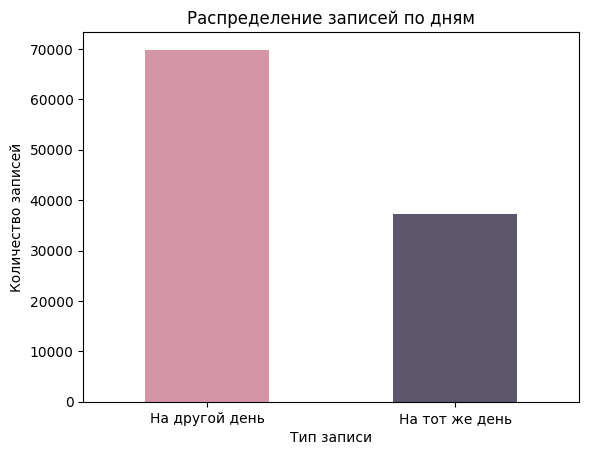

In [204]:
data3=pd.DataFrame({
    'Тип записи': ['На другой день', 'На тот же день'],
    'Количество': [other_day_count, same_day_count]
}).plot.bar(x='Тип записи', y='Количество', color=['#d496a7', '#5d576b'], legend=False)

plt.title('Распределение записей по дням')
plt.ylabel('Количество записей')
plt.xticks(rotation=0)
plt.show()

In [205]:
print(f"Записей на тот же день: {same_day_count} ({same_day_count/len(df):.1%})")
print(f"Записей на другой день: {other_day_count} ({other_day_count/len(df):.1%})")

Записей на тот же день: 37154 (34.7%)
Записей на другой день: 69833 (65.3%)


In [206]:
data4=df[same_day_mask==False]


In [207]:
data5=df[same_day_mask==True]

<Axes: xlabel='sms_received', ylabel='count'>

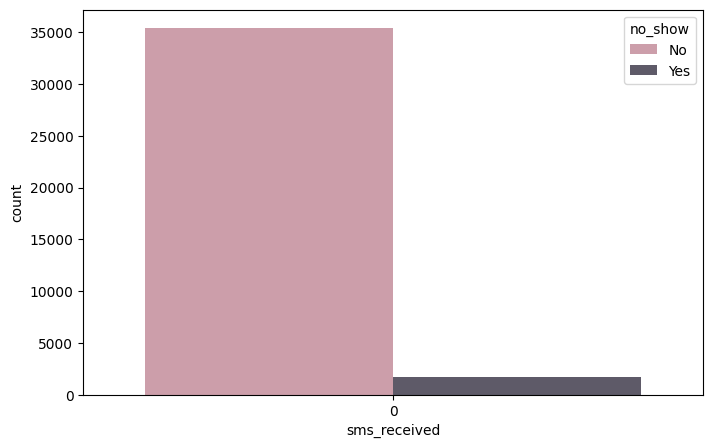

In [208]:
plt.figure(figsize=(8,5))
sns.countplot(x='sms_received',hue='no_show',data=data5, palette=['#d496a7', '#5d576b', '#f1dede'])

<Axes: xlabel='sms_received', ylabel='count'>

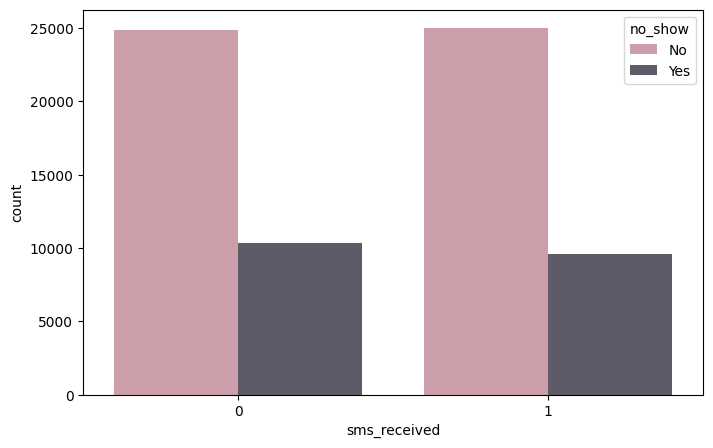

In [209]:
plt.figure(figsize=(8,5))
sns.countplot(x='sms_received',hue='no_show',data=data4, palette=colors)

Анализ пациентов,которые пришли на прием в тот же день, как их записали, демонстрирует, что корреляции между отправлением sms и их посещением практически нет


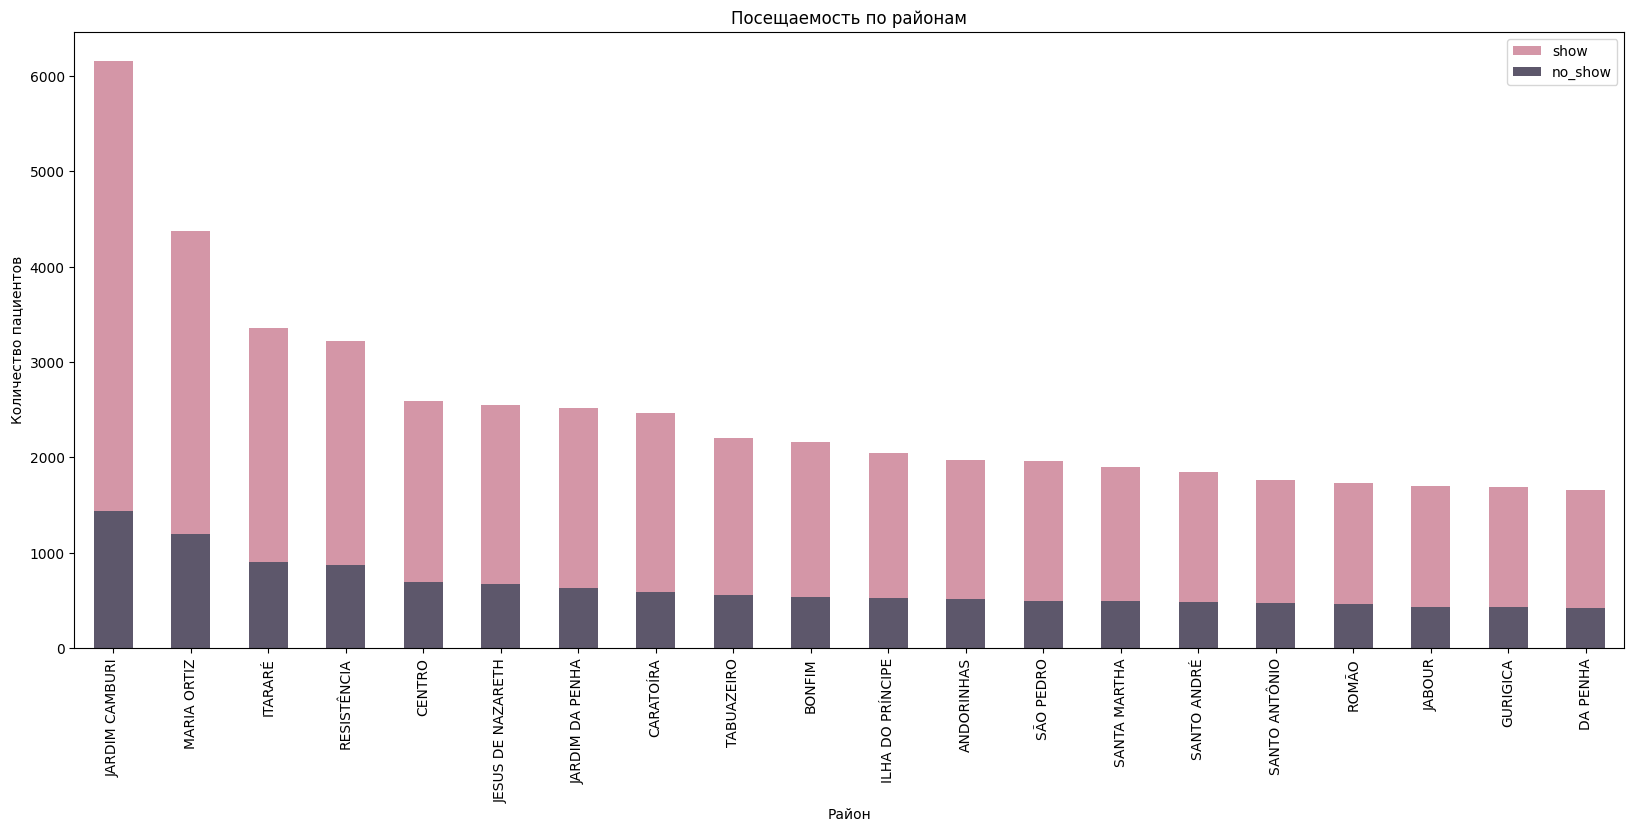

In [210]:
plt.figure(figsize=(20, 8))
df[show]['neighbourhood'].value_counts().head(20).plot(kind='bar', label='show',color=colors[0])
df[no_show]['neighbourhood'].value_counts().head(20).plot(kind='bar',  label='no_show',color=colors[1])
plt.title('Посещаемость по районам')
plt.xlabel('Район')
plt.ylabel('Количество пациентов')
plt.legend()
plt.show()

По пациентам тем, кто приходит на явку и те кто не приходит наблюдается примерно одинаковое соотношение проживания по регионам, лидирующие значения занимают такие регионы как JARDIM CAMBURI, MARIA ORTIZ и ITARARÉ

In [211]:
df.no_show.value_counts()

,count
no_show,
No,85307
Yes,21680


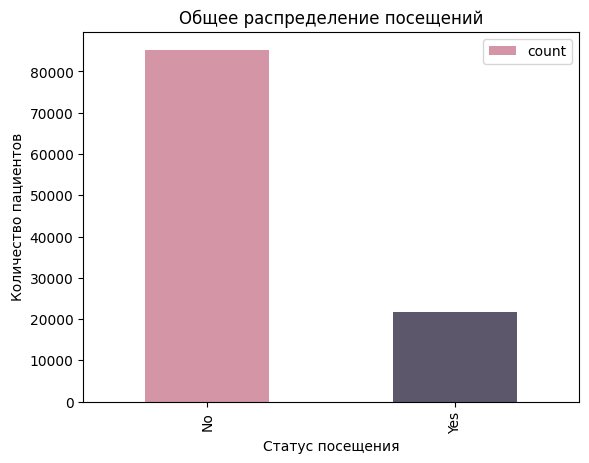

In [212]:
df['no_show'].value_counts().plot(
    kind='bar',
    color=colors
)
plt.title('Общее распределение посещений')
plt.xlabel('Статус посещения')
plt.ylabel('Количество пациентов')
plt.legend()
plt.show()

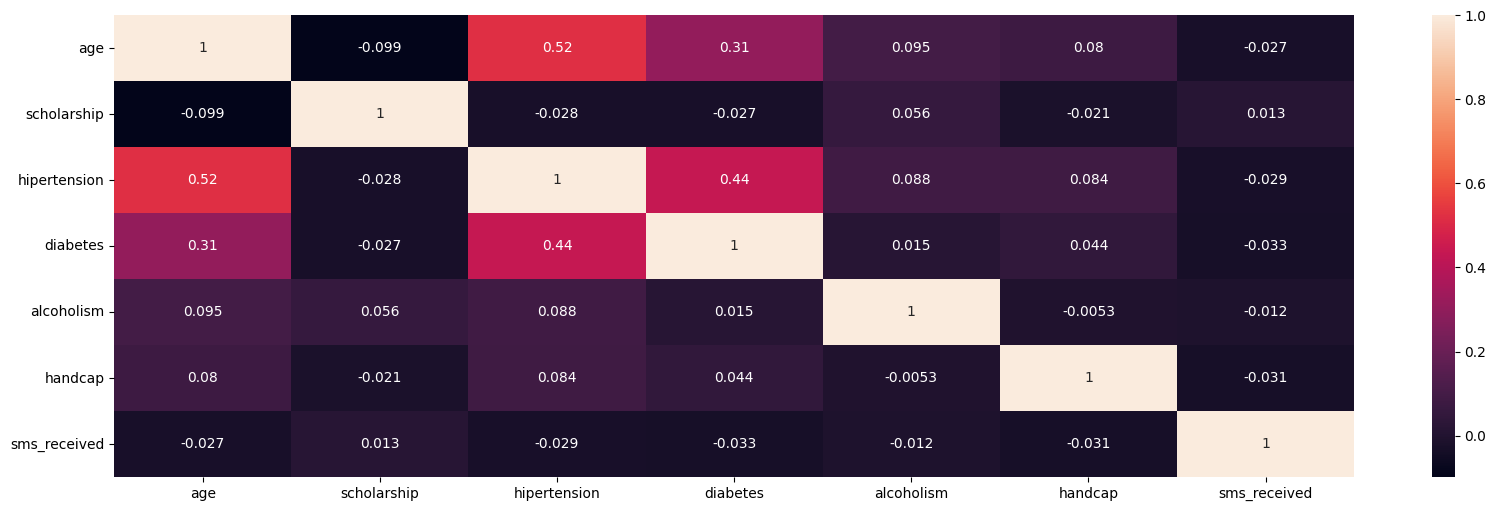

In [213]:
plt.figure(figsize=(20, 6))
sns.heatmap(df[no_show][numeric_columns].corr(),annot=True)
plt.show()

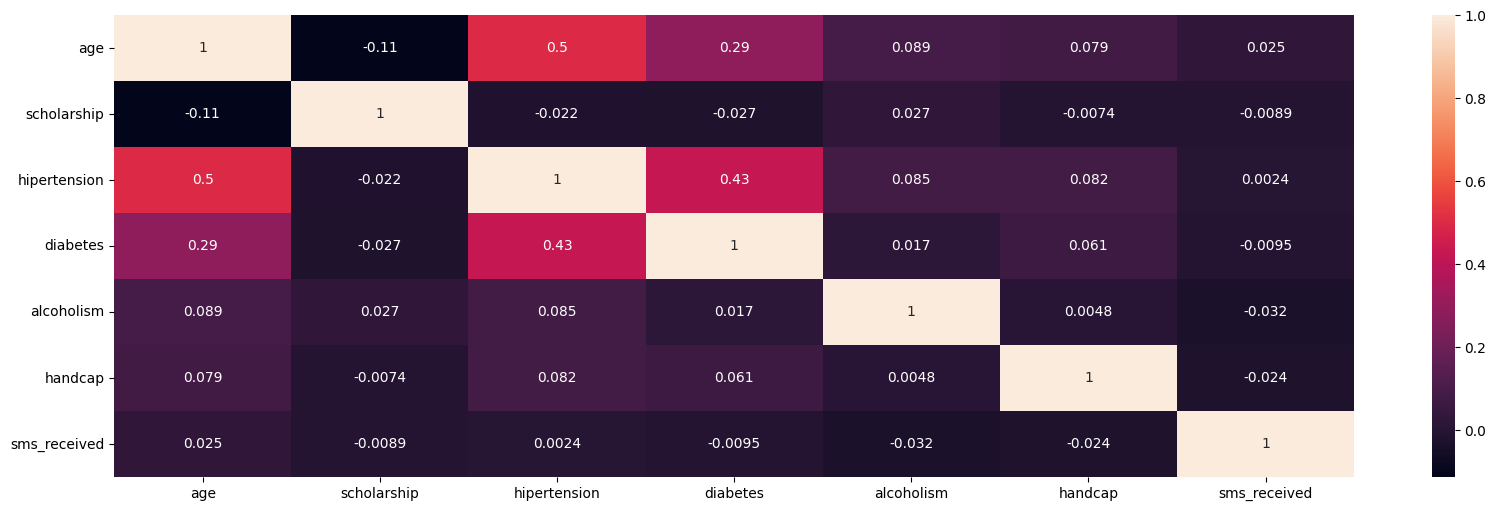

In [214]:
plt.figure(figsize=(20, 6))
sns.heatmap(df[show][numeric_columns].corr(),annot=True)
plt.show()

Матрица корреляции показывает как в одной так и в другой группе связь между такими признаками как age и hipertension, age и diabetes, hipertension и diabetes, остальные признаки оказывают слабое влияние на результат явки (не явки)

Вычисляем разницу в днях (и удаляем возможные отрицательные значения)

In [215]:
df['days_between'] = (df['appointment_day'] - df['scheduled_day']).dt.days

In [216]:
df = df[df['days_between'] >= 0]

Подготовим два датасета для дальнейшей работы с данными:

In [217]:
df_show = df[show]
df_no_show = df[no_show]

В анализе выше, который был проведён в разрезе пациентов которые приходят и не приходят на приёмы мы анализировали такие признаки как возраст, день назначения, регион, получение sms-уведомления, в разрезе пола и наличия хронических заболеваний . В заключении увиденному и проанализированному отобразим графики

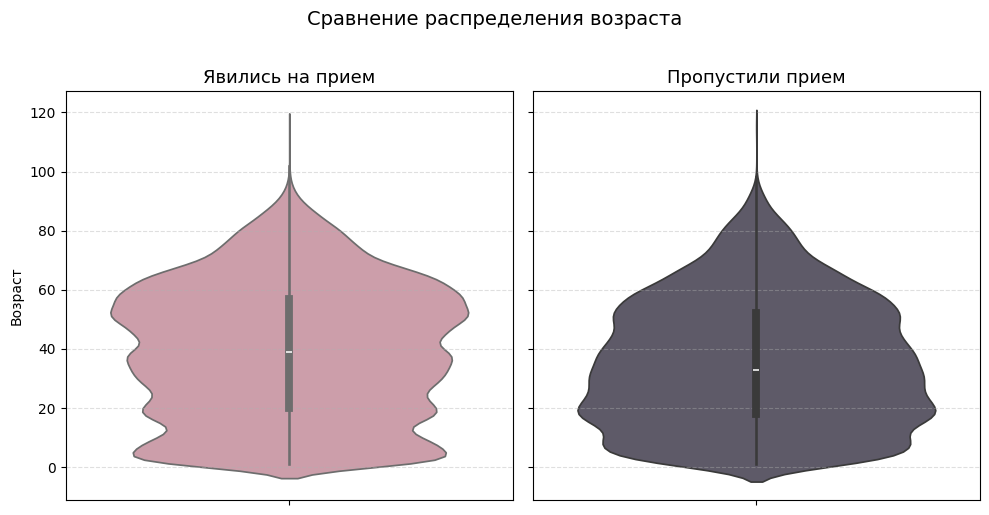

In [219]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# График для Show
sns.violinplot(y='age', data=df_show, color=colors[0], ax=ax1, inner='box')
ax1.set_title('Явились на прием', fontsize=13)
ax1.set_ylabel('Возраст')
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# График для No-show
sns.violinplot(y='age', data=df_no_show, color=colors[1], ax=ax2, inner='box')
ax2.set_title('Пропустили прием', fontsize=13)
ax2.grid(axis='y', linestyle='--', alpha=0.4)


fig.suptitle('Сравнение распределения возраста', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

График виолин также демонстрирует, но уже более наглядно факт того, что в группе пациентов которые не приходят на приём люди более молодые в возрасте примерно 18-50 лет, в то время как в группе пациентов которые явились преобладают пациенты более старшего возраста от 42 - 75 лет. Делаем предварительный вывод, что люди которые не имеют серьёзных проблем со здоровьем (предполагаем по возрасту) более склонны к не явке.

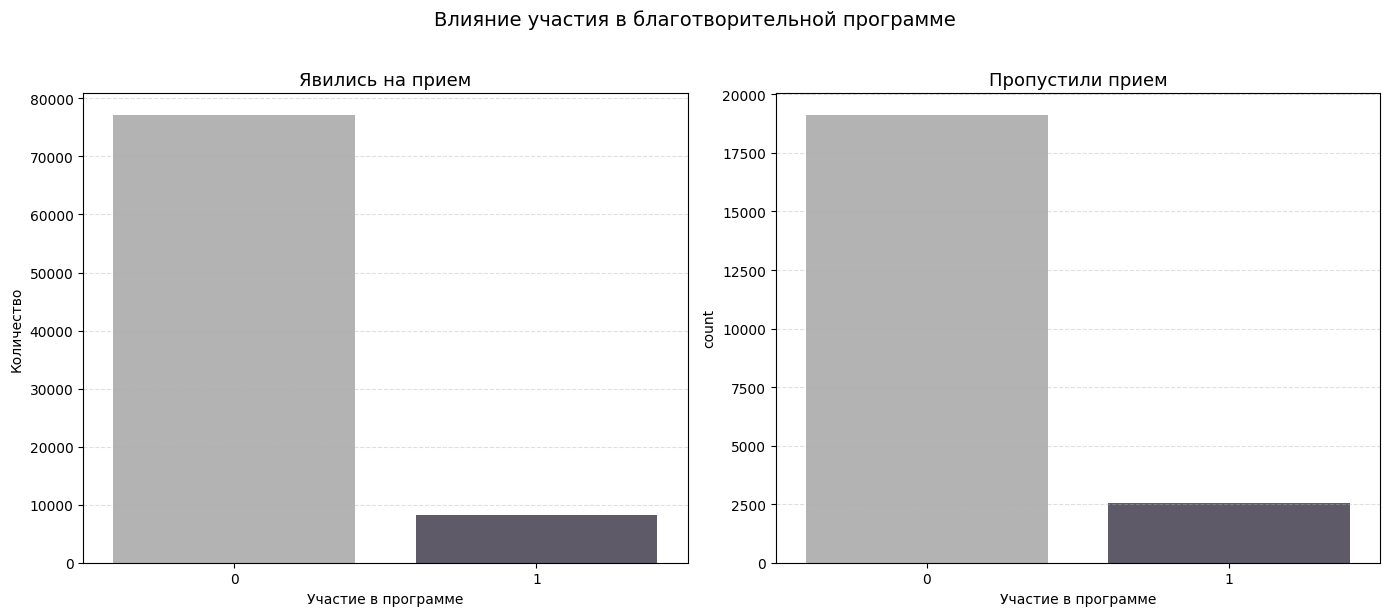

In [220]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# График для Show
sns.countplot(x='scholarship', data=df_show, palette=['#b3b3b3', colors[1]], ax=ax1)
ax1.set_title('Явились на прием', fontsize=13)
ax1.set_xlabel('Участие в программе')
ax1.set_ylabel('Количество')
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# График для No-show
sns.countplot(x='scholarship', data=df_no_show, palette=['#b3b3b3', colors[1]], ax=ax2)
ax2.set_title('Пропустили прием', fontsize=13)
ax2.set_xlabel('Участие в программе')
ax2.grid(axis='y', linestyle='--', alpha=0.4)

fig.suptitle('Влияние участия в благотворительной программе', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

В данных присутствует дисбаланс групп, и анализируя график отличие пациентов которые учавствовали и не учавствовали в программе лечения не значительно, утверждать что есть значимые отличия мы не можем.

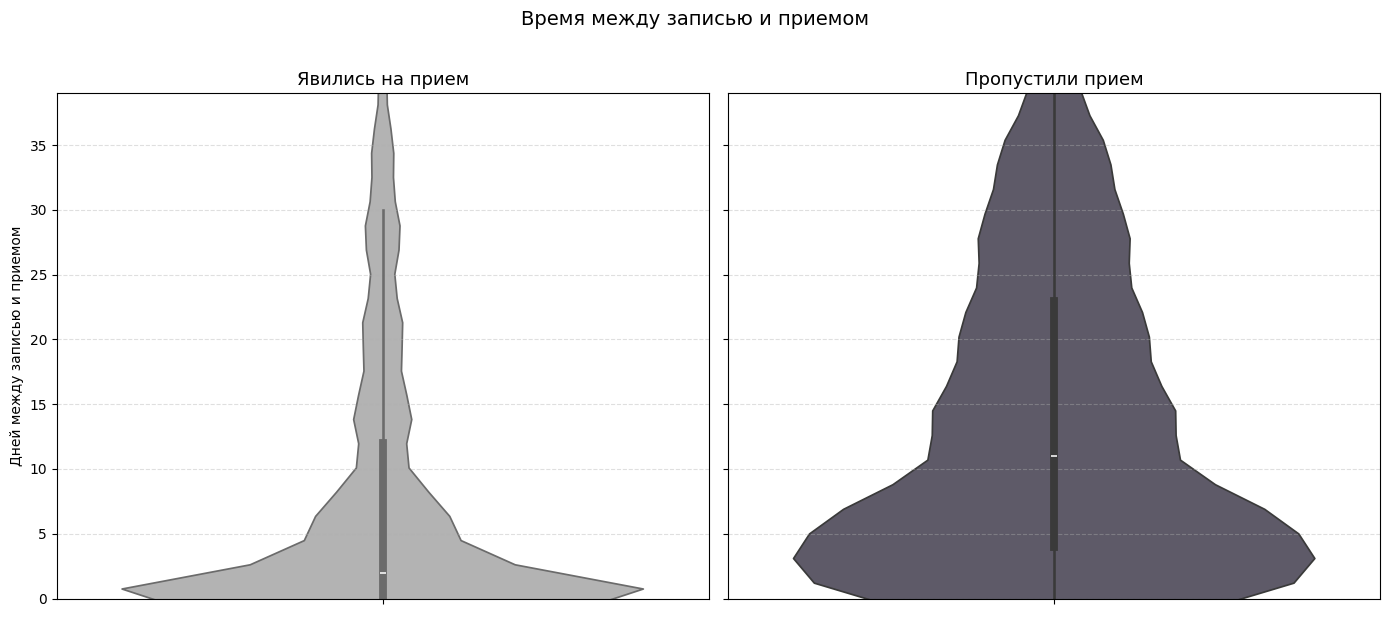

In [221]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# График для Show
sns.violinplot(y='days_between', data=df_show, color='#b3b3b3', ax=ax1, inner='box')
ax1.set_title('Явились на прием', fontsize=13)
ax1.set_ylabel('Дней между записью и приемом')
ax1.set_ylim(0, df['days_between'].quantile(0.95))
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# График для No-show
sns.violinplot(y='days_between', data=df_no_show, color=colors[1], ax=ax2, inner='box')
ax2.set_title('Пропустили прием', fontsize=13)
ax2.set_ylim(0, df['days_between'].quantile(0.95))
ax2.grid(axis='y', linestyle='--', alpha=0.4)

fig.suptitle('Время между записью и приемом', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

Мы рассчитали новый признак для наших данных, который потребуется в дальнейшей работе (постановке гипотез)  - это разница дней между назначением и собственно явкой пациента на приём. Выше мы подробно разбирали данные по датам, теперь отрисовали график violin, на котором видно, что люди которые являлись на приём имеют диапазон разницы в пределах 0-5 дней, в то время как в группе которые на самом деле не являются диапазон увеличен в районе 10-37 дней (основное распределение не повторяет первую группу 0-10 дней), чем в первой группе.

Мы провели обширный и подробный анализ данных на основании которого можно подвести предварительные итоги:

Основной контингент пациентов — женщины, чаще всего из района Jardim Camburi. Явка выше среди пациентов старше 40 лет, тогда как молодые люди (18–50 лет) чаще пропускают приёмы.

Ключевой фактор, влияющий на неявку, — длительное ожидание приёма. Пациенты, записанные заранее (особенно более чем за 10 дней), пропускают чаще. SMS-напоминания не показали значимого эффекта, а наличие хронических заболеваний (гипертония, диабет), наоборот, снижает вероятность пропуска.

Рекомендации:

Уменьшать срок между записью и приёмом (оптимально до 7 дней).

Для молодых пациентов внедрить дополнительные напоминания (не только SMS).


## Проверка статистических гипотез

### Гипотеза 1: Влияние SMS-напоминаний на no-show

H₀: SMS-напоминания не влияют на долю no-show.

H₁: SMS-напоминания снижают долю no-show.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ks_2samp, shapiro, levene, mannwhitneyu

In [ ]:
a = 0.05

sms_received=df[df['sms_received']==1]
no_sms=df[df['sms_received']==0]
count = np.array([no_sms['no_show'].eq('Yes').sum(), sms_received['no_show'].eq('Yes').sum()])
nobs = np.array([len(no_sms), len(sms_received)])

Z_stat, p_value = proportions_ztest(count, nobs, alternative='smaller')


Проведём Z-test для пропорций

In [ ]:
print(Z_stat)
print(p_value)

if p_value < a:
  print("Отвергаем Н0: SMS снижают долю no-show")
else:
  print("Нет оснований отвергнуть Н0: SMS не влияют на no-show")

-41.64745685776041
0.0
Отвергаем Н0: SMS снижают долю no-show


Тест показал, что у нас нет оснований утверждать что нулевая гипотеза верна, SMS  снижают долю не явок.

### Гипотеза 2: Разница в среднем времени записи (days_difference)

H₀: Средний интервал между записью и приёмом одинаков для Show и No-show.

H₁: Интервал различается.

Нам надо проверить данные на нормальность и гомогенность дисперсий, чтобы обосновать выбор  теста для проверки гипотез.

In [ ]:
show_days=df_show['days_between']
no_show_days=df_no_show['days_between']

In [ ]:
_, p_show= shapiro(show_days)
_, p_noshow = shapiro(no_show_days)

Проверка равенства дисперсий

In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

In [ ]:
_, p_levene = levene(show_days, no_show_days)

In [ ]:
if p_show > a and p_noshow > a:
    _, p_var = levene(show_days, no_show_days)
    if p_var > a:
        stat, p_value = ttest_ind(show_days, no_show_days)
        test_name = "t-тест"
    else:
        stat, p_value = mannwhitneyu(show_days, no_show_days)
        test_name = "U-тест (разные дисперсии)"
else:
    stat, p_value = mannwhitneyu(show_days, no_show_days)
    test_name = "U-тест (ненормальные данные)"


In [ ]:
print(f"Использован {test_name}:")
print(f"Статистика = {stat:.1f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Вывод: Отвергаем H₀ - интервалы различаются (p < 0.05)")
else:
    print("Вывод: Нет различий между группами (p > 0.05)")

Использован U-тест (ненормальные данные):
Статистика = 558496185.5, p-value = 0.0000
Вывод: Отвергаем H₀ - интервалы различаются (p < 0.05)


### Гипотеза 3: Распределение возраста в группах

H₀: Возрастное распределение одинаково в Show и No-show.

H₁: Распределение различается.

In [ ]:
show_age=df_show['age']
no_show_age=df_no_show['age']
ks_2samp,p_value=ks_2samp(show_age,no_show_age)

In [ ]:
_, p_show = shapiro(show_age)
_, p_no_show = shapiro(no_show_age)
print(f"Нормальность show: {p_show >= a}")
print(f"Нормальность no-show: {p_no_show >= a}")

Нормальность show: False
Нормальность no-show: False


Проверка на нормальность распределения данных не подтвердилась, дополнительно посмотрим на равенство дисперсий

In [ ]:
_, p_levene = levene(show_age, no_show_age)
print(f"Равенство дисперсий: {p_levene >= a}")

Равенство дисперсий: False


In [ ]:
if p_show >= a and p_no_show >= a:
    print("Используем t-тест")
    from scipy.stats import ttest_ind
    stat, p_value = ttest_ind(show_age, no_show_age)
else:
    print("Используем критерий Колмогорова-Смирнова")
    stat, p_value = ks_2samp(show_age, no_show_age)

Используем критерий Колмогорова-Смирнова


In [ ]:
print(stat)
print(p_value)

if p_value < a:
  print("Отвергаем Н0: распределение возраста различается")
else:
  print("Нет оснований отвергнуть Н0: распределение одинаковое")

0.09275911417787353
7.1555246574270515e-130
Отвергаем Н0: распределение возраста различается


Так как распределение возраста в группах было не нормальное и также дисперсия это подтвердила, был использован критерий Колмогорова-Смирнова, который также подтвердил, что в сравниваемых группах возраст пациентов раздичается.

После тщательного анализа данных мы пришли к следующим выводам. Во-первых, SMS-напоминания действительно помогают - пациенты, которые их получали, реже пропускали приёмы. Это  видно по цифрам, поэтому можно смело рекомендовать использовать рассылку напоминаний.

Во-вторых, оказалось, что когда запись на приём делается слишком заранее, вероятность пропуска увеличивается. Видимо, люди просто забывают о записи, сделанной за несколько недель или месяцев. Значит, нужно либо стараться назначать приёмы на более близкие даты, либо делать дополнительные напоминания для таких записей.

Что касается возраста пациентов, то здесь обнаружилась интересная закономерность. Возрастной состав тех, кто пришёл на приём, и тех, кто пропустил, заметно отличается. Хотя мы пока не исследовали причины этого, уже понятно, что к разным возрастным группам, возможно, нужен разный подход в напоминаниях и мотивации.